# 📊 Exploratory Data Analysis: S&P 500 Companies
The S&P 500 index represents the performance of 500 of the largest companies listed on U.S. stock exchanges. These companies span across major sectors of the U.S. economy and provide a comprehensive snapshot of corporate America’s financial health and market behavior.
Understanding the composition, financial metrics, and industry representation of these companies is essential for investors, analysts, and business strategists alike.

This notebook performs an in-depth EDA on the S&P 500 companies dataset using **Python**.  
We'll analyze market trends, sector distributions, financial correlations, and clustering patterns using:
- **Pandas**
- **Matplotlib**
- **Seaborn**
- **Scikit-learn**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After importing the reuired libraries for the analysis, we then import the data and store it in the variable below.

In [2]:
df = pd.read_csv("sp500_companies_cleaned.csv")

### Optional: Configure plot aesthetics

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
df.head()

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,is_bank,ebitda_clean,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0,1.346610e+11,0.061,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,0,6.118400e+10,1.224,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0,1.365520e+11,0.160,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0,1.115830e+11,0.110,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0,1.234700e+11,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.042309


### Basic info and summary statistics`

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   exchange             502 non-null    object 
 1   symbol               502 non-null    object 
 2   shortname            502 non-null    object 
 3   longname             502 non-null    object 
 4   sector               502 non-null    object 
 5   industry             502 non-null    object 
 6   currentprice         502 non-null    float64
 7   marketcap            502 non-null    int64  
 8   ebitda               473 non-null    float64
 9   is_bank              502 non-null    int64  
 10  ebitda_clean         473 non-null    float64
 11  revenuegrowth        499 non-null    float64
 12  city                 502 non-null    object 
 13  state                482 non-null    object 
 14  country              502 non-null    object 
 15  fulltimeemployees    502 non-null    int

In [6]:
df.describe()

,currentprice,marketcap,ebitda,is_bank,ebitda_clean,revenuegrowth,fulltimeemployees,weight
count,502.000000,5.020000e+02,4.730000e+02,502.000000,4.730000e+02,499.000000,5.020000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.027888,7.045286e+09,0.070541,5.788309e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.164817,1.624213e+10,0.180247,1.392890e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,0.000000,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.000000,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.000000,2.952748e+09,0.051000,2.159500e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.000000,6.020000e+09,0.109000,5.362425e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.000000,1.495470e+11,1.632000,2.100000e+06,0.069209


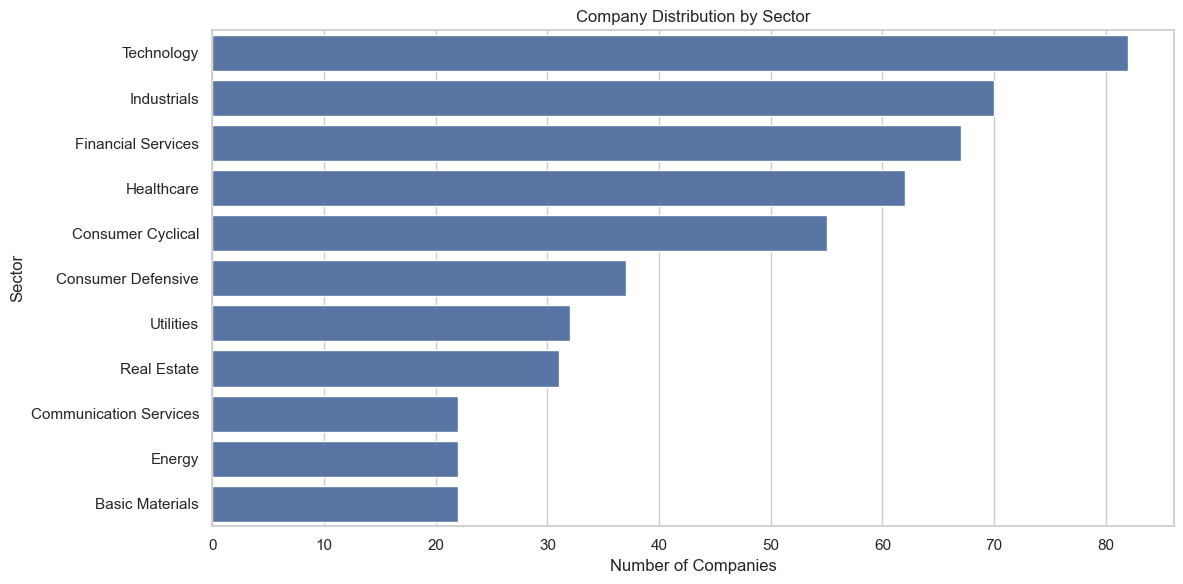

In [7]:
plt.figure()
sns.countplot(data=df, y="sector", order=df["sector"].value_counts().index)
plt.title("Company Distribution by Sector")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

The Graph above shows the number of companies in each Sector, with Technology taking the lead having more than 80 companies in its sector.

Text(0.5, 0, 'Industry')

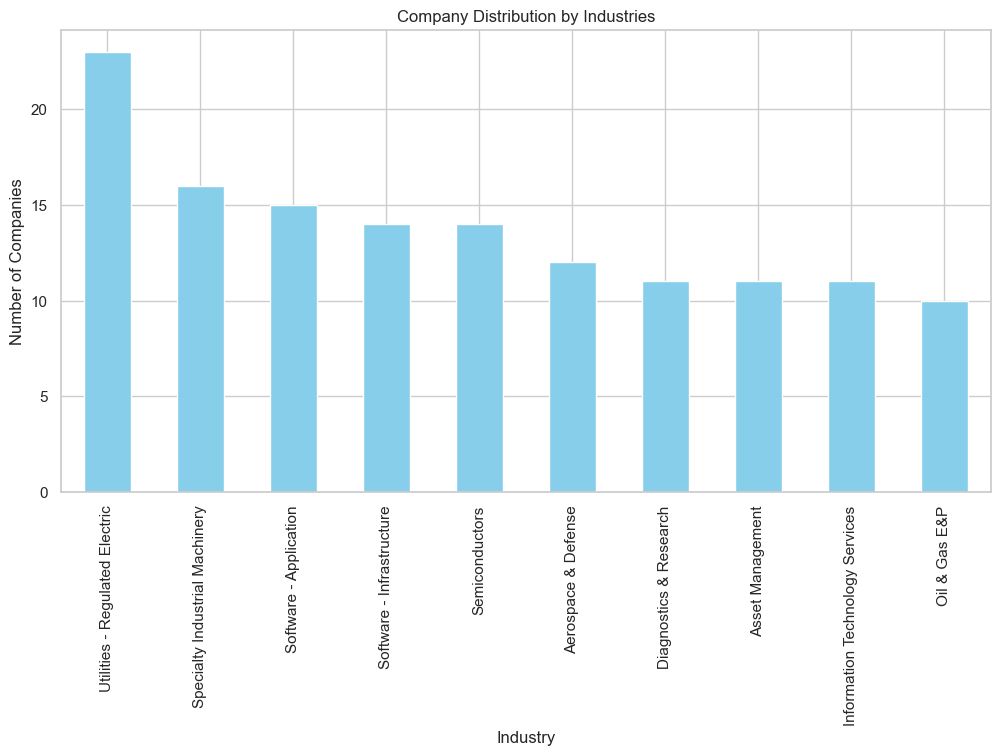

In [9]:
df['industry'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Company Distribution by Industries")
plt.ylabel("Number of Companies")
plt.xlabel("Industry")

The light blue graph shows the company distribution by idustries. lets look at it in a Tabular form.

In [14]:
df.industry.value_counts().head(10)

industry
Utilities - Regulated Electric     23
Specialty Industrial Machinery     16
Software - Application             15
Software - Infrastructure          14
Semiconductors                     14
Aerospace & Defense                12
Diagnostics & Research             11
Asset Management                   11
Information Technology Services    11
Oil & Gas E&P                      10
Name: count, dtype: int64

So we can conclude that Utilities - Regulated Electric Industry is leading the in companies.

### 💰 Top 10 Companies by Market Capitalization

In [16]:
top_marketcap = df.sort_values(by="marketcap", ascending=False).head(10)
top_marketcap.head()

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,is_bank,ebitda_clean,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0,1.346610e+11,0.061,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,0,6.118400e+10,1.224,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0,1.365520e+11,0.160,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0,1.115830e+11,0.110,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0,1.234700e+11,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.042309


C:\Users\me\AppData\Local\Temp\ipykernel_13116\1540056819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_marketcap, x="marketcap", y="shortname", palette="viridis")


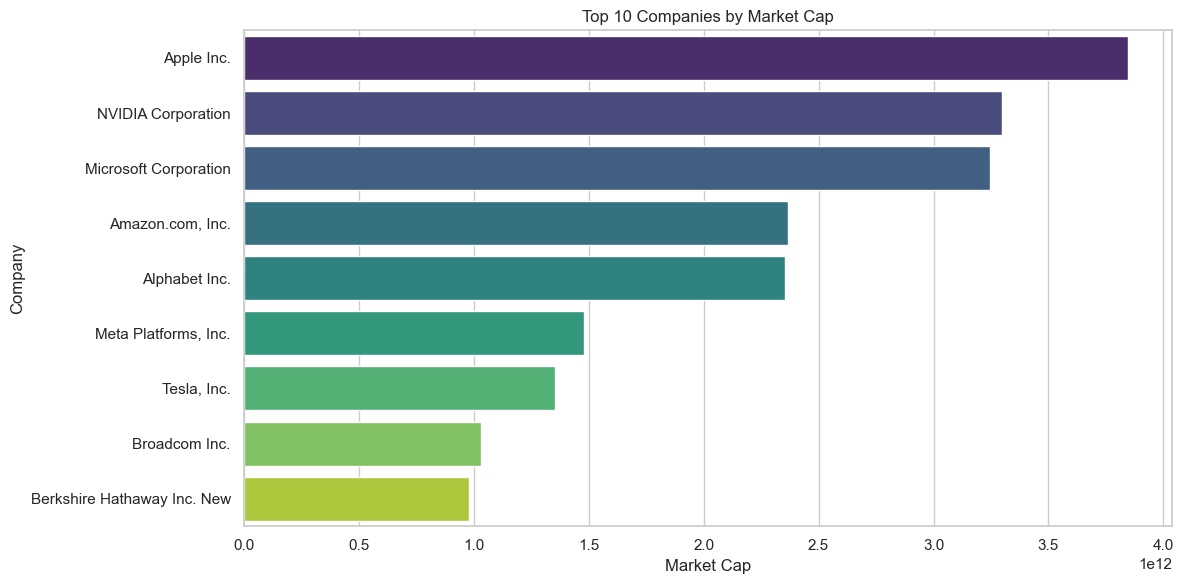

In [17]:
plt.figure()
sns.barplot(data=top_marketcap, x="marketcap", y="shortname", palette="viridis")
plt.title("Top 10 Companies by Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Company")
plt.tight_layout()
plt.show()